In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import datetime
import regex as re

import warnings
warnings.filterwarnings('ignore')

In [100]:
df= pd.read_csv("laptop_price_euros.csv", encoding='latin-1')
#df = pd.read_csv('laptop_data.csv')

#https://stackoverflow.com/questions/71419895/utf-8-codec-cant-decode-byte-0xed


In [101]:
df.shape

(1303, 13)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [103]:
df.describe(include='all')

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
count,1303.000000,1303,1303,1303,1303.000000,1303,1303,1303,1303,1303,1303,1303,1303.000000
unique,NaN,19,618,6,NaN,40,118,9,39,110,9,179,NaN
top,NaN,Dell,XPS 13,Notebook,NaN,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,NaN
freq,NaN,297,30,727,NaN,507,190,619,412,281,1072,121,NaN
mean,660.155794,NaN,NaN,NaN,15.017191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1123.686992
std,381.172104,NaN,NaN,NaN,1.426304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,699.009043
min,1.000000,NaN,NaN,NaN,10.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174.000000
25%,331.500000,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,599.000000
50%,659.000000,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,977.000000
75%,990.500000,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1487.880000


In [104]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [105]:
#There is no null values .
#the laptop _id column is redundant as we have an index number identifying each laptop.
df.drop(columns=['laptop_ID'],inplace=True)

#df.drop(columns=['Unnamed: 0'],inplace=True)

In [106]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [107]:
#check for any duplicate data
df.duplicated().sum()

28

In [108]:
#drop duplicate data.
df=df.drop_duplicates()

In [109]:
# Now to perform cross join, we will create
# a key column in both the DataFrames to 
# merge on that key.
df['key'] = 1

In [110]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,key
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,1
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,1
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,1


In [112]:
import requests
from datetime import datetime

url = "https://api.apilayer.com/exchangerates_data/latest?symbols=USD&base=EUR"

payload = {}
headers= {
  "apikey": "hxkwXBwsXge3jh6mSXfePN73RMquWZOY"
}

response = requests.request("GET", url, headers=headers, data = payload)

status_code = response.status_code
result = response.text

print(status_code)

print(result)

output = response.json()
print(output['rates']['USD'])

200
{
    "success": true,
    "timestamp": 1668503823,
    "base": "EUR",
    "date": "2022-11-15",
    "rates": {
        "USD": 1.039987
    }
}

1.039987


In [113]:
rate_fetched =output['rates']['USD']
#rate_fetched = 80.12
#dictionary 
data = {'Rate': rate_fetched}
df_api = pd.DataFrame(data, index =[0])
df_api['key'] = 1
df_api

,Rate,key
0,1.039987,1


In [114]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 0 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rate    1 non-null      float64
 1   key     1 non-null      int64  
dtypes: float64(1), int64(1)
memory usage: 24.0 bytes


In [115]:
df = pd.merge(df, df_api, on ='key').drop("key", 1)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 0 to 1274
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1275 non-null   object 
 1   Product           1275 non-null   object 
 2   TypeName          1275 non-null   object 
 3   Inches            1275 non-null   float64
 4   ScreenResolution  1275 non-null   object 
 5   Cpu               1275 non-null   object 
 6   Ram               1275 non-null   object 
 7   Memory            1275 non-null   object 
 8   Gpu               1275 non-null   object 
 9   OpSys             1275 non-null   object 
 10  Weight            1275 non-null   object 
 11  Price_euros       1275 non-null   float64
 12  Rate              1275 non-null   float64
dtypes: float64(3), object(10)
memory usage: 139.5+ KB


In [117]:
df

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Rate
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,1.039987
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1.039987
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1.039987
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,1.039987
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,1.039987
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,1.039987
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,1.039987
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,1.039987
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,1.039987


In [118]:
df["Price"] = df["Price_euros"]*df["Rate"]

In [119]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Rate,Price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,1.039987,1393.260184
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1.039987,934.885914
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1.039987,597.992525
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,1.039987,2638.915013
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,1.039987,1875.720553


#  Feature - 'Type' , Analyse

Text(0.5, 1.0, 'Laptop Price by TypeName')

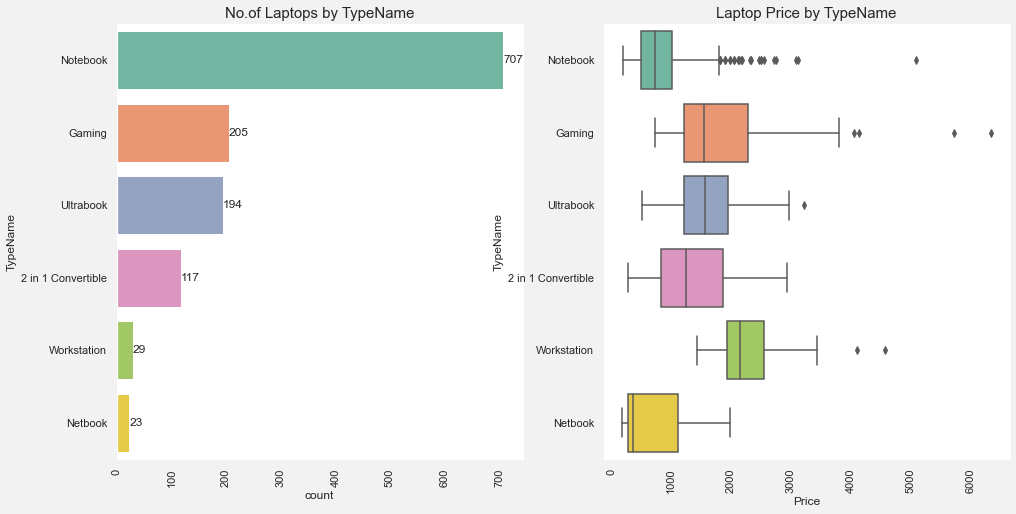

In [120]:
pallet = "Set2" #["#998289","#9981A0","#F5B7B1","#F9E79F"]
sns.set(rc={"axes.facecolor":"1","figure.facecolor":".95",'figure.figsize':(16,8)})
fig, axes = plt.subplots(1,2)
for ax in fig.axes:
    plt.axes(ax) 
    # sca method also fine plt.sca(ax) 
    #  ref : https://stackoverflow.com/questions/24416612/setting-active-subplot-using-axes-object-in-matplotlib
    plt.xticks(rotation=90)

plot_2 = sns.countplot(y="TypeName",ax=axes[0],palette=pallet,data=df,order=df["TypeName"].value_counts().index)
for i in plot_2.containers:
    plot_2.bar_label(i,)
sns.boxplot(x ='Price',y ="TypeName" ,palette=pallet,data = df,order=df["TypeName"].value_counts().index)

axes[0].set_title("No.of Laptops by TypeName",fontsize=15)
axes[1].set_title("Laptop Price by TypeName",fontsize=15)

#  Feature - 'Company' , Analyse

Text(0.5, 1.0, 'Laptop Price by Company')

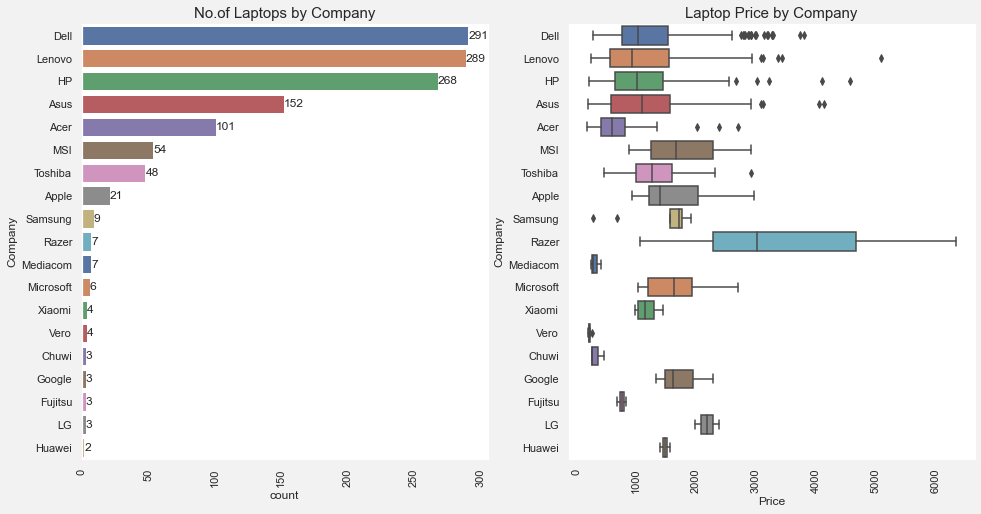

In [121]:
pallet = "deep" #["#998289","#9981A0","#F5B7B1","#F9E79F"]
sns.set(rc={"axes.facecolor":"1","figure.facecolor":".95",'figure.figsize':(16,8)})
fig, axes = plt.subplots(1,2)
for ax in fig.axes:
    plt.axes(ax) 
    # sca method also fine plt.sca(ax) 
    #  ref : https://stackoverflow.com/questions/24416612/setting-active-subplot-using-axes-object-in-matplotlib
    plt.xticks(rotation=90)

plot_2 = sns.countplot(y="Company",ax=axes[0],palette=pallet,data=df,order=df["Company"].value_counts().index)
for i in plot_2.containers:
    plot_2.bar_label(i,)
sns.boxplot(x ='Price',y ="Company" ,palette=pallet,data = df,order=df["Company"].value_counts().index)

axes[0].set_title("No.of Laptops by Company",fontsize=15)
axes[1].set_title("Laptop Price by Company",fontsize=15)

# Feature - 'TOUCHSCREEN' , Create feature using Regex & For iterator
 I would like to match Caseinsensitive followed by zero or one space than you can use regex syntax: [ ]{0,1}

In [122]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                505
1366x768                                         263
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Quad HD+ / Touchscreen 3200x1800    

In [123]:
mylist =[]
for values in df['ScreenResolution']:
    if re.search(r"Touch[ ]{0,1}screen", values, re.IGNORECASE):
        mylist.append(1)
    else:    
        mylist.append(0)
df["Touchscreen"] = mylist  
df.sample(5)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Rate,Price,Touchscreen
505,Lenovo,ThinkPad 13,Notebook,13.3,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.44kg,949.0,1.039987,986.947663,0
803,Dell,XPS 15,Notebook,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i5 7300HQ 2.5GHz,8GB,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.06kg,1749.0,1.039987,1818.937263,1
955,Dell,Alienware 17,Gaming,17.3,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.36kg,3154.0,1.039987,3280.118998,0
370,Asus,ZenBook Flip,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12GB,512GB SSD + 2TB HDD,Nvidia GeForce GT 940MX,Windows 10,2.26kg,1099.0,1.039987,1142.945713,1
129,HP,ProBook 470,Notebook,17.3,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,2.5kg,928.0,1.039987,965.107936,0


In [124]:
#sns.set(rc={"axes.facecolor":"1","figure.facecolor":".95",'figure.figsize':(5,3)})
#df['Touchscreen'].value_counts().plot(kind='bar')

In [126]:
#sns.set(rc={"axes.facecolor":"1","figure.facecolor":".95",'figure.figsize':(5,3)})
#sns.barplot(x=df['Touchscreen'],y=df['Price'])

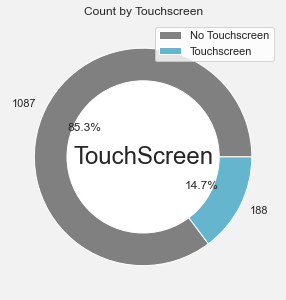

In [127]:
#https://www.geeksforgeeks.org/donut-chart-using-matplotlib-in-python/
#https://towardsdatascience.com/basics-of-donut-charts-with-pythons-matplotlib-100cf71b259d
sns.set(rc={"axes.facecolor":"1","figure.facecolor":".95",'figure.figsize':(8,5)})
colors = [ 'grey','c']
plt.pie(df['Touchscreen'].value_counts(),colors=colors, labels= df['Touchscreen'].value_counts(), autopct='%1.1f%%')
circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
labels = ['No Touchscreen', 'Touchscreen']
plt.legend(labels,loc=0)
plt.title('Count by Touchscreen')
plt.text(0, 0, "TouchScreen", ha='center', va='center', fontsize=24)
plt.show()

# Feature - 'IPS' , Create feature , using Regex & For iterator

In [128]:
mylist =[]
for values in df['ScreenResolution']:
    if re.search(r"IPS[ ]{1}", values):
        mylist.append(1)
    else:  
        mylist.append(0)
df["IPS"] = mylist  
df.sample(5)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Rate,Price,Touchscreen,IPS
1204,Asus,FX502VM-DM105T (i7-6700HQ/8GB/1TB/GeForce,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.2kg,1169.00,1.039987,1215.744803,0,0
374,Dell,Inspiron 5379,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.62kg,869.01,1.039987,903.759103,1,0
979,Asus,Rog GL753VE-DS74,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.99kg,1749.00,1.039987,1818.937263,0,0
94,Asus,Zenbook UX430UA,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.25kg,1049.00,1.039987,1090.946363,0,0
467,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,2TB HDD,AMD Radeon 530,Windows 10,2.02kg,759.00,1.039987,789.350133,0,0


In [129]:
#sns.set(rc={"axes.facecolor":"1","figure.facecolor":".95",'figure.figsize':(5,3)})
#df['IPS'].value_counts().plot(kind='bar')

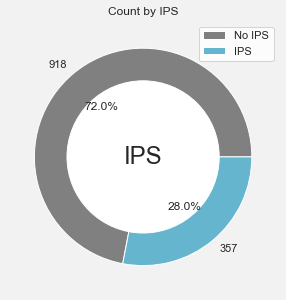

In [130]:
#df['IPS'].value_counts().plot(kind='bar')
sns.set(rc={"axes.facecolor":"1","figure.facecolor":".95",'figure.figsize':(8,5)})
colors = [ 'grey','c']
plt.pie(df['IPS'].value_counts(),colors=colors, labels= df['IPS'].value_counts(), autopct='%1.1f%%')
circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
labels = ['No IPS', 'IPS']
plt.legend(labels,loc=0)
plt.title('Count by IPS')
plt.text(0, 0, "IPS", ha='center', va='center', fontsize=24)
plt.show()

<AxesSubplot:xlabel='IPS', ylabel='Price'>

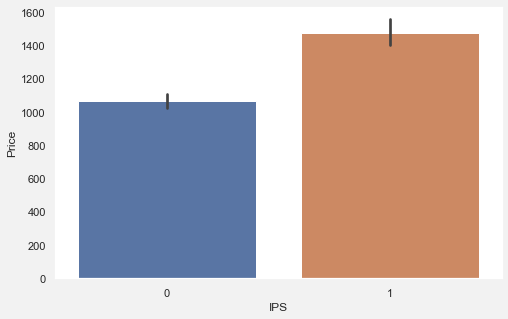

In [131]:
sns.barplot(x=df['IPS'],y=df['Price'])

In [132]:
mylist_X =[]
mylist_Y=[]
for values in df['ScreenResolution']:
    current = re.findall(r"\d{3}\d?",values)
    #print(current[0]+' x '+current[1])
    mylist_X.append(current[0])
    mylist_Y.append(current[1])
df["X_resolution"] = mylist_X
df["Y_resolution"] = mylist_Y
df["Resolution"] = df["X_resolution"]+'X'+df["Y_resolution"]
df["X_resolution"]= df["X_resolution"].astype('int')
df["Y_resolution"]= df["Y_resolution"].astype('int')
df.sample(5)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Rate,Price,Touchscreen,IPS,X_resolution,Y_resolution,Resolution
776,Lenovo,Thinkpad P50,Notebook,15.6,4K Ultra HD 3840x2160,Intel Core i7 6820HQ 2.7GHz,16GB,512GB SSD,Nvidia Quadro M2000M,Windows 7,2.5kg,2370.0,1.039987,2464.769190,0,0,3840,2160,3840X2160
1257,Dell,Vostro 3568,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 10,2.29kg,490.0,1.039987,509.593630,0,0,1366,768,1366X768
1156,MSI,GP72M 7REX,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.7kg,1492.8,1.039987,1552.492594,0,0,1920,1080,1920X1080
647,Razer,Blade Pro,Gaming,14.0,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD,Nvidia GeForce GTX 1060,Windows 10,1.95kg,2599.0,1.039987,2702.926213,0,0,1920,1080,1920X1080
470,HP,Spectre x360,2 in 1 Convertible,13.3,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 8550U 1.8GHz,8GB,512GB SSD,Intel UHD Graphics 620,Windows 10,1.29kg,1999.0,1.039987,2078.934013,1,1,3840,2160,3840X2160


In [133]:
df['ppi'] = (((df["X_resolution"]**2) + (df["Y_resolution"]**2))**0.5/df['Inches']).astype('float')

<AxesSubplot:xlabel='Inches', ylabel='count'>

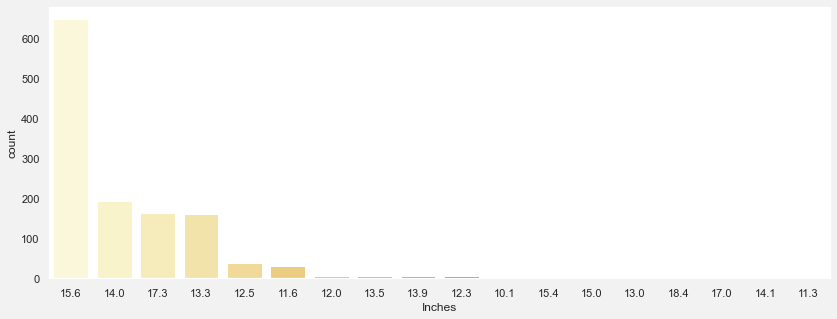

In [134]:
pallet_1 = ["#998289","#9981A0","#F5B7B1","#F9E79F"]
sns.set(rc={"axes.facecolor":"1","figure.facecolor":".95",'figure.figsize':(14,5)})
sns.countplot(x=df["Inches"],palette="YlOrBr",order=df["Inches"].value_counts().index,data=df)

<AxesSubplot:xlabel='count', ylabel='Resolution'>

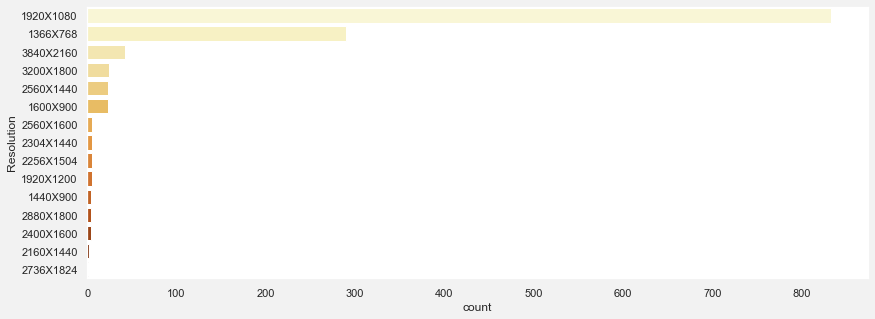

In [135]:
pallet_1 = ["plum","#9981A0","#F5B7B1","#F9E79F"]
sns.set(rc={"axes.facecolor":"1","figure.facecolor":".95",'figure.figsize':(14,5)})
sns.countplot(y=df["Resolution"],palette="YlOrBr",order=df["Resolution"].value_counts().index,data=df)

In [136]:
df.drop(columns=['Resolution'],inplace=True)

# Feature - 'OPERATING SYSTEM' 

In [137]:
df['OpSys'].value_counts()

Windows 10      1048
No OS             66
Linux             58
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [138]:
#Function definition for simplifing/categorizing the operating system 
def cat_os(inp):
    if re.search(r"window", inp, re.IGNORECASE):
        return 'Windows'
    elif re.search(r"mac", inp, re.IGNORECASE):
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [139]:
# Function call
df['os'] = df['OpSys'].apply(cat_os)
df.sample(5)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Rate,Price,Touchscreen,IPS,X_resolution,Y_resolution,ppi,os
81,Apple,"MacBook 12""",Ultrabook,12.0,IPS Panel Retina Display 2304x1440,Intel Core i5 1.3GHz,8GB,512GB SSD,Intel HD Graphics 615,macOS,0.92kg,1510.0,1.039987,1570.380370,0,1,2304,1440,226.415547,Mac
789,Dell,Inspiron 7567,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.62kg,985.0,1.039987,1024.387195,0,0,1920,1080,141.211998,Windows
955,Dell,Alienware 17,Gaming,17.3,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.36kg,3154.0,1.039987,3280.118998,0,1,3840,2160,254.671349,Windows
701,Lenovo,IdeaPad 320-15AST,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9420 2.9GHz,4GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,399.0,1.039987,414.954813,0,0,1920,1080,141.211998,Windows
388,Dell,Precision 5520,Workstation,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6820HQ 2.7GHz,8GB,256GB SSD,Nvidia Quadro M1200,Windows 10,2kg,2135.0,1.039987,2220.372245,0,1,1920,1080,141.211998,Windows


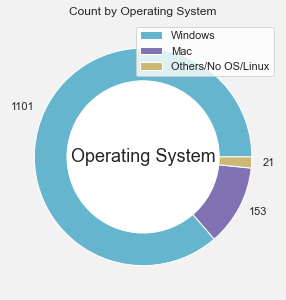

In [187]:
colors = [ 'c', 'm', 'y']
plt.pie(df['os'].value_counts(),colors=colors, labels= df['os'].value_counts())
circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
labels = ['Windows', 'Mac',"Others/No OS/Linux"]
plt.legend(labels,loc=0)
plt.title('Count by Operating System')
plt.text(0, 0, "Operating System", ha='center', va='center', fontsize=18)
plt.show()

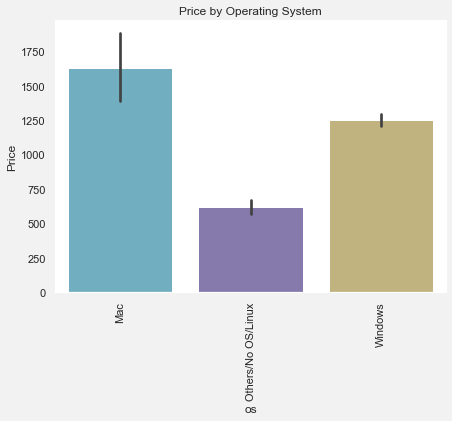

In [141]:
colors = [ 'c', 'm', 'y']
sns.set(rc={"axes.facecolor":"1","figure.facecolor":".95",'figure.figsize':(7,5)})
sns.barplot(x=df['os'],y=df['Price'],palette=colors)
plt.xticks(rotation='vertical')
plt.title('Price by Operating System')
plt.show()

# Feature RAM & Weight

In [142]:
#remove GB from RAM & Kg from weight fields
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')
#cast RAM & weight to int
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 0 to 1274
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1275 non-null   object 
 1   Product           1275 non-null   object 
 2   TypeName          1275 non-null   object 
 3   Inches            1275 non-null   float64
 4   ScreenResolution  1275 non-null   object 
 5   Cpu               1275 non-null   object 
 6   Ram               1275 non-null   int32  
 7   Memory            1275 non-null   object 
 8   Gpu               1275 non-null   object 
 9   OpSys             1275 non-null   object 
 10  Weight            1275 non-null   float32
 11  Price_euros       1275 non-null   float64
 12  Rate              1275 non-null   float64
 13  Price             1275 non-null   float64
 14  Touchscreen       1275 non-null   int64  
 15  IPS               1275 non-null   int64  
 16  X_resolution      1275 non-null   int32  


Text(0.5, 1.0, 'Laptop Price by Ram')

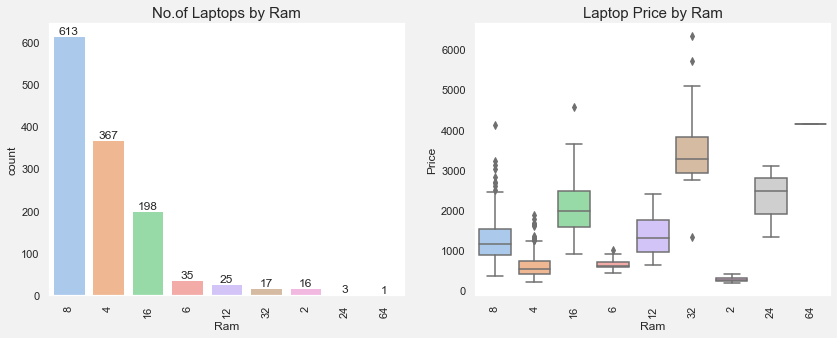

In [180]:
pallet = "pastel" #["#998289","#9981A0","#F5B7B1","#F9E79F"]
sns.set(rc={"axes.facecolor":"1","figure.facecolor":".95",'figure.figsize':(14,5)})
fig, axes = plt.subplots(1,2)
for ax in fig.axes:
    plt.axes(ax) 
    # sca method also fine plt.sca(ax) 
    #  ref : https://stackoverflow.com/questions/24416612/setting-active-subplot-using-axes-object-in-matplotlib
    plt.xticks(rotation=90)

plot_1 = sns.countplot(x="Ram",ax=axes[0],palette=pallet,data=df,order=df["Ram"].value_counts().index)
for i in plot_1.containers:
    plot_1.bar_label(i,)

sns.boxplot(y ='Price',x ="Ram" ,palette=pallet,data = df,order=df["Ram"].value_counts().index)

axes[0].set_title("No.of Laptops by Ram",fontsize=15)
axes[1].set_title("Laptop Price by Ram",fontsize=15)

In [43]:
df=df[df["Ram"].isin([24,64]) == False]

In [44]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Rate,Price,Touchscreen,IPS,X_resolution,Y_resolution,ppi,os
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,1.032839,1383.684080,0,1,2560,1600,226.983005,Mac
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1.032839,928.460291,0,0,1440,900,127.677940,Mac
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,1.032839,593.882425,0,0,1920,1080,141.211998,Others/No OS/Linux
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,1.032839,2620.777321,0,1,2880,1800,220.534624,Mac
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,1.032839,1862.828420,0,1,2560,1600,226.983005,Mac


<AxesSubplot:xlabel='Weight', ylabel='Density'>

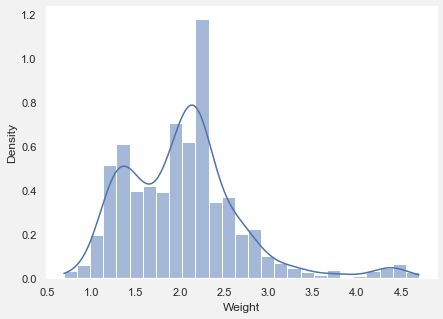

In [45]:
sns.histplot(df['Weight'],kde=True,stat ="density")

# Feature - 'GPU' 

In [47]:
df['Gpu'].value_counts()

Intel HD Graphics 620      278
Intel HD Graphics 520      181
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 108, dtype: int64

In [48]:
df['Gpu']=df['Gpu'].apply(lambda x:x.split()[0])
df.sample(5)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Rate,Price,Touchscreen,IPS,X_resolution,Y_resolution,ppi,os
988,Dell,Inspiron 5567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD,Windows 10,2.36,749.00,1.032839,773.596411,0,0,1366,768,100.454670,Windows
823,MSI,GL62M 7RD,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,256GB SSD,Nvidia,Windows 10,2.40,1199.00,1.032839,1238.373961,0,0,1920,1080,141.211998,Windows
47,Asus,Rog Strix,Gaming,17.3,Full HD 1920x1080,AMD Ryzen 1700 3GHz,8,256GB SSD + 1TB HDD,AMD,Windows 10,3.20,1299.00,1.032839,1341.657861,0,0,1920,1080,127.335675,Windows
579,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,AMD,Linux,2.20,749.01,1.032839,773.606739,0,0,1920,1080,141.211998,Others/No OS/Linux
725,Lenovo,V310-15IKB (i5-7200U/4GB/1TB/No,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,1TB HDD,Intel,No OS,1.90,489.90,1.032839,505.987826,0,0,1366,768,100.454670,Others/No OS/Linux


In [49]:
df['Gpu'].value_counts()

Intel     703
Nvidia    393
AMD       174
ARM         1
Name: Gpu, dtype: int64

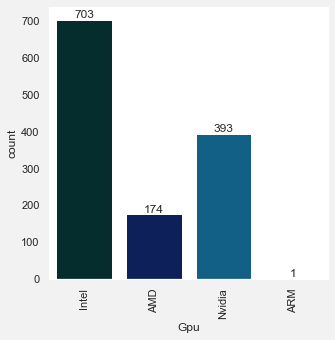

In [50]:
x_plot = df['Gpu']
sns.set(rc={"axes.facecolor":"1","figure.facecolor":".95",'figure.figsize':(5,5)})
plot_1 = sns.countplot(x=x_plot , palette="ocean" )
plt.xticks(rotation='vertical')
for i in plot_1.containers:
    plot_1.bar_label(i,)
plt.show()

In [51]:
# ---Remove Outlier GPU Brand = 'ARM'----

In [52]:
df = df[df['Gpu'] != 'ARM']

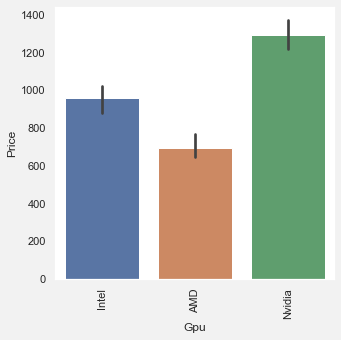

In [53]:
#using  numpy as np & matplotlib.pyplot as plt

x_plot = df['Gpu']
y_plot = df['Price']
estimator_chosen = np.median
sns.set(rc={"axes.facecolor":"1","figure.facecolor":".95",'figure.figsize':(5,5)})
sns.barplot(x=x_plot , y=y_plot, estimator = estimator_chosen )
plt.xticks(rotation='vertical')
plt.show()

[Text(0, 0.5, '')]

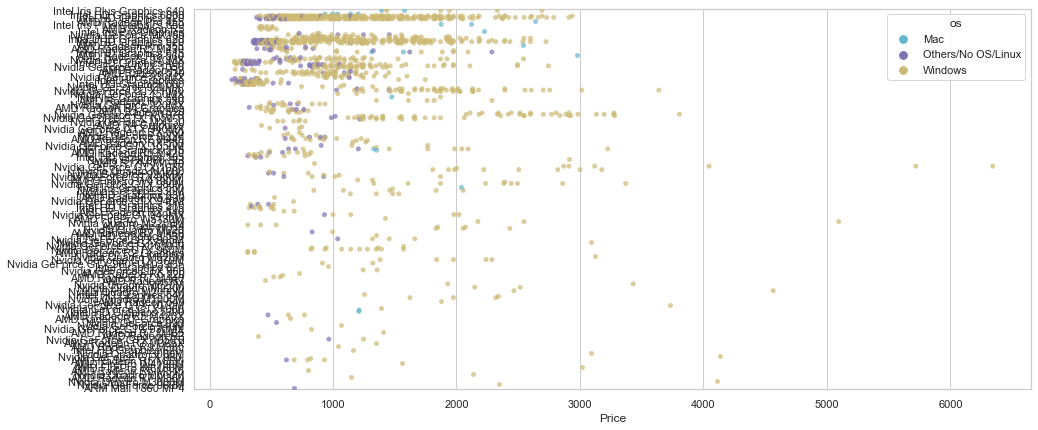

In [189]:
#https://seaborn.pydata.org/examples/scatterplot_categorical.html
#import seaborn as sns
colors = [ 'c', 'm', 'y']
sns.set(rc={"axes.facecolor":"1","figure.facecolor":".95",'figure.figsize':(15,7)})
sns.set_theme(style="whitegrid", palette= colors)

# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=df, x="Price", y="Gpu", hue="os", alpha=0.7,s=5)
ax.set(ylabel="")

[Text(0, 0.5, 'Price')]

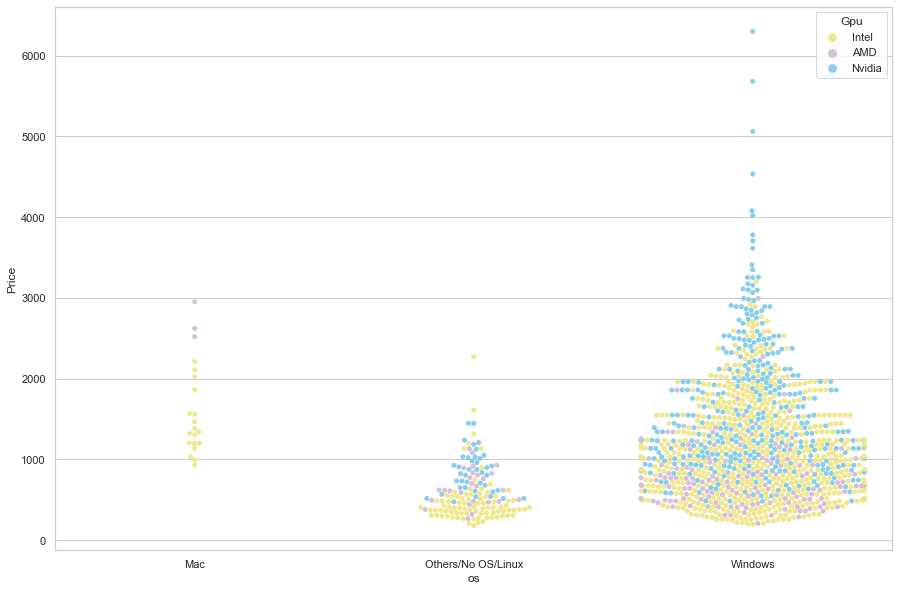

In [55]:
#https://seaborn.pydata.org/examples/scatterplot_categorical.html
#import seaborn as sns
palette_swarm = ["khaki","thistle", "skyblue"]
sns.set(rc={"axes.facecolor":"1","figure.facecolor":".95",'figure.figsize':(15,10)})
sns.set_theme(style="whitegrid", palette=palette_swarm)

# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=df, y="Price", x="os", hue="Gpu", alpha=1,s=5)
ax.set(ylabel="Price")

# Feature - 'CPU' 

In [56]:
df['cpu_frq(GHz)']=df['Cpu'].str.extract(r"(\d+(?:\.\d+)\s*GHz)")
df['cpu_frq(GHz)']=df['cpu_frq(GHz)'].str.replace("GHz","")
df['cpu_frq(GHz)']=df['cpu_frq(GHz)'].astype(float)
df.sample(5)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,...,Price_euros,Rate,Price,Touchscreen,IPS,X_resolution,Y_resolution,ppi,os,cpu_frq(GHz)
848,HP,EliteBook x360,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel,Windows 10,...,2277.0,1.032839,2351.774403,1,0,1920,1080,165.632118,Windows,2.5
1147,Dell,Vostro 5568,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Nvidia,Windows 10,...,1009.9,1.032839,1043.064106,0,0,1920,1080,141.211998,Windows,2.7
613,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4,1TB HDD,Intel,Linux,...,359.0,1.032839,370.789201,0,0,1366,768,100.454670,Others/No OS/Linux,2.0
938,Dell,Latitude 7480,Ultrabook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel,Windows 10,...,1639.0,1.032839,1692.823121,0,0,1920,1080,157.350512,Windows,2.5
421,Chuwi,LapBook 12.3,Notebook,12.3,IPS Panel Retina Display 2736x1824,Intel Celeron Quad Core N3450 1.1GHz,6,64GB Flash Storage,Intel,Windows 10,...,449.0,1.032839,463.744711,0,1,2736,1824,267.338436,Windows,1.1


In [57]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [58]:
#define function
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [59]:
#call function
df['Cpu Brand'] = df['Cpu Name'].apply(fetch_processor)

In [60]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,...,Price,Touchscreen,IPS,X_resolution,Y_resolution,ppi,os,cpu_frq(GHz),Cpu Name,Cpu Brand
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel,macOS,...,1383.684080,0,1,2560,1600,226.983005,Mac,2.3,Intel Core i5,Intel Core i5
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel,macOS,...,928.460291,0,0,1440,900,127.677940,Mac,1.8,Intel Core i5,Intel Core i5
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel,No OS,...,593.882425,0,0,1920,1080,141.211998,Others/No OS/Linux,2.5,Intel Core i5,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD,macOS,...,2620.777321,0,1,2880,1800,220.534624,Mac,2.7,Intel Core i7,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel,macOS,...,1862.828420,0,1,2560,1600,226.983005,Mac,3.1,Intel Core i5,Intel Core i5


<AxesSubplot:title={'center':'Count by CPU'}>

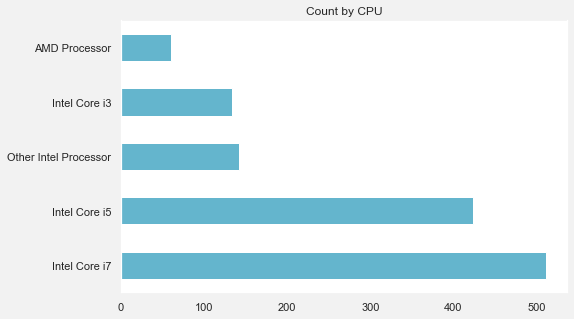

In [61]:
sns.set(rc={"axes.facecolor":"1","figure.facecolor":".95",'figure.figsize':(8,5)})
df['Cpu Brand'].value_counts().plot(kind='barh',color="c",title= 'Count by CPU' , rot=0 )

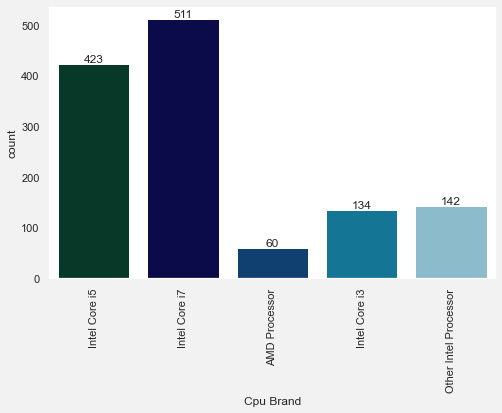

In [62]:
sns.set(rc={"axes.facecolor":"1","figure.facecolor":".95",'figure.figsize':(8,5)})
x_plot = df['Cpu Brand']
plot_1 = sns.countplot(x=x_plot , palette="ocean" )
plt.xticks(rotation='vertical')
for i in plot_1.containers:
    plot_1.bar_label(i,)
plt.show()

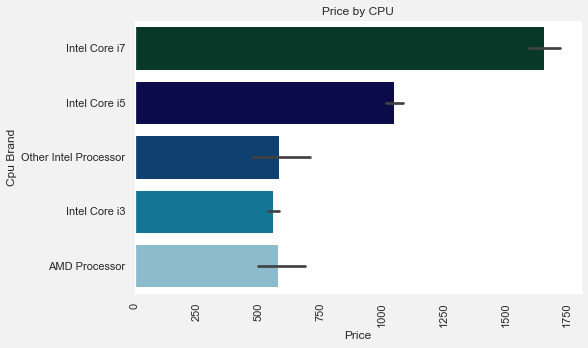

In [63]:
sns.set(rc={"axes.facecolor":"1","figure.facecolor":".95",'figure.figsize':(8,5)})
sns.barplot(y=df['Cpu Brand'],x=df['Price'],palette="ocean",order=df['Cpu Brand'].value_counts().index)
plt.xticks(rotation='vertical')
plt.title('Price by CPU')
plt.show()

# Features - 'Memory' 

In [64]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          215
500GB HDD                        124
512GB SSD                        112
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              72
32GB Flash Storage                35
2TB HDD                           16
512GB SSD +  1TB HDD              14
64GB Flash Storage                13
1TB SSD                           13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [65]:
mylist_memory =[]
for values in df["Memory"]:
    values = re.sub(r'\.0', '',values)
    values = re.sub(r'TB', '000',values)
    values = re.sub(r'GB', '',values)
    #print(values)
    mylist_memory.append(values)
df["Memory"] = mylist_memory 

In [66]:
df['Memory'].value_counts()

256 SSD                         412
1000 HDD                        216
500 HDD                         124
512 SSD                         112
128 SSD +  1000 HDD              94
128 SSD                          74
256 SSD +  1000 HDD              72
32 Flash Storage                 35
2000 HDD                         16
512 SSD +  1000 HDD              14
64 Flash Storage                 13
1000 SSD                         13
256 SSD +  2000 HDD              10
256 Flash Storage                 8
16 Flash Storage                  7
1000 Hybrid                       7
32 SSD                            6
180 SSD                           5
128 Flash Storage                 4
512 SSD +  2000 HDD               3
16 SSD                            3
512 Flash Storage                 2
1000 SSD +  1000 HDD              2
256 SSD +  500 HDD                2
128 SSD +  2000 HDD               2
256 SSD +  256 SSD                2
512 SSD +  256 SSD                1
512 SSD +  512 SSD          

In [67]:
#split each string value in df into two parts
new = df["Memory"].str.split("+", n = 1, expand = True)

df["part1"]= new[0]
df["part1"]=df["part1"].str.strip()
#The strip() method removes any leading (spaces at the beginning) and trailing (spaces at the end) characters
df["part2"]= new[1]

df["part1HDD"] = df["part1"].apply(lambda x: 1 if "HDD" in x else 0)
df["part1SSD"] = df["part1"].apply(lambda x: 1 if "SSD" in x else 0)
df["part1Hybrid"] = df["part1"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["part1Flash_Storage"] = df["part1"].apply(lambda x: 1 if "Flash Storage" in x else 0)
# replace non digits
df['part1'] = df['part1'].str.replace(r'\D', '')
# replace NULLS with 0
df["part2"].fillna("0", inplace = True)

df["part2HDD"] = df["part2"].apply(lambda x: 1 if "HDD" in x else 0)
df["part2SSD"] = df["part2"].apply(lambda x: 1 if "SSD" in x else 0)
df["part2Hybrid"] = df["part2"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["part2Flash_Storage"] = df["part2"].apply(lambda x: 1 if "Flash Storage" in x else 0)
# replace non digits
df['part2'] = df['part2'].str.replace(r'\D', '')

df["part1"] = df["part1"].astype(int)
df["part2"] = df["part2"].astype(int)

df["HDD"]=(df["part1"]*df["part1HDD"]+df["part2"]*df["part2HDD"])
df["SSD"]=(df["part1"]*df["part1SSD"]+df["part2"]*df["part2SSD"])
df["Hybrid"]=(df["part1"]*df["part1Hybrid"]+df["part2"]*df["part2Hybrid"])
df["Flash_Storage"]=(df["part1"]*df["part1Flash_Storage"]+df["part2"]*df["part2Flash_Storage"])

df.drop(columns=['part1', 'part2', 'part1HDD', 'part1SSD', 'part1Hybrid',
       'part1Flash_Storage', 'part2HDD', 'part2SSD', 'part2Hybrid',
       'part2Flash_Storage'],inplace=True)

In [68]:
df

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,...,Y_resolution,ppi,os,cpu_frq(GHz),Cpu Name,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel,macOS,...,1600,226.983005,Mac,2.3,Intel Core i5,Intel Core i5,0,128,0,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel,macOS,...,900,127.677940,Mac,1.8,Intel Core i5,Intel Core i5,0,0,0,128
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel,No OS,...,1080,141.211998,Others/No OS/Linux,2.5,Intel Core i5,Intel Core i5,0,256,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD,macOS,...,1800,220.534624,Mac,2.7,Intel Core i7,Intel Core i7,0,512,0,0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel,macOS,...,1600,226.983005,Mac,3.1,Intel Core i5,Intel Core i5,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128 SSD,Intel,Windows 10,...,1080,157.350512,Windows,2.5,Intel Core i7,Intel Core i7,0,128,0,0
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512 SSD,Intel,Windows 10,...,1800,276.053530,Windows,2.5,Intel Core i7,Intel Core i7,0,512,0,0
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64 Flash Storage,Intel,Windows 10,...,768,111.935204,Windows,1.6,Intel Celeron Dual,Other Intel Processor,0,0,0,64
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1000 HDD,AMD,Windows 10,...,768,100.454670,Windows,2.5,Intel Core i7,Intel Core i7,1000,0,0,0


In [69]:
df.corr()['Price']

Inches           0.061328
Ram              0.746145
Weight           0.208056
Price_euros      1.000000
Rate                  NaN
Price            1.000000
Touchscreen      0.195548
IPS              0.251899
X_resolution     0.557480
Y_resolution     0.554590
ppi              0.477190
cpu_frq(GHz)     0.429927
HDD             -0.094546
SSD              0.663585
Hybrid           0.023398
Flash_Storage   -0.035945
Name: Price, dtype: float64

In [70]:
df.drop(columns=['Memory','Hybrid','Flash_Storage'],inplace=True)

In [71]:
df.drop(columns=['Rate'],inplace=True)

In [72]:
df.drop(columns=['Price_euros'],inplace=True)

In [73]:
df.drop(columns=['X_resolution','Y_resolution','Inches'],inplace=True)

<AxesSubplot:xlabel='Weight', ylabel='Price'>

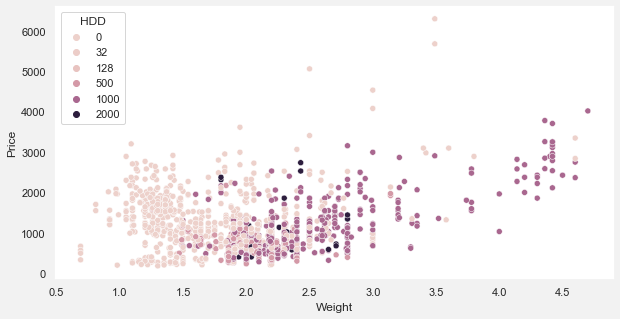

In [74]:
sns.set(rc={"axes.facecolor":"1","figure.facecolor":".95",'figure.figsize':(10,5)})
sns.scatterplot(x=df['Weight'],y=df['Price'], hue=df["HDD"])

<AxesSubplot:>

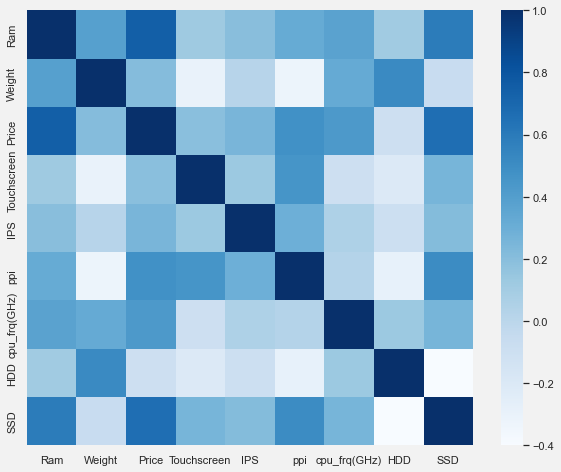

In [75]:
#sns.heatmap(df.corr())
sns.set(rc={"axes.facecolor":"1","figure.facecolor":".95",'figure.figsize':(10,8)})
sns.heatmap(df.corr(),cmap="Blues")

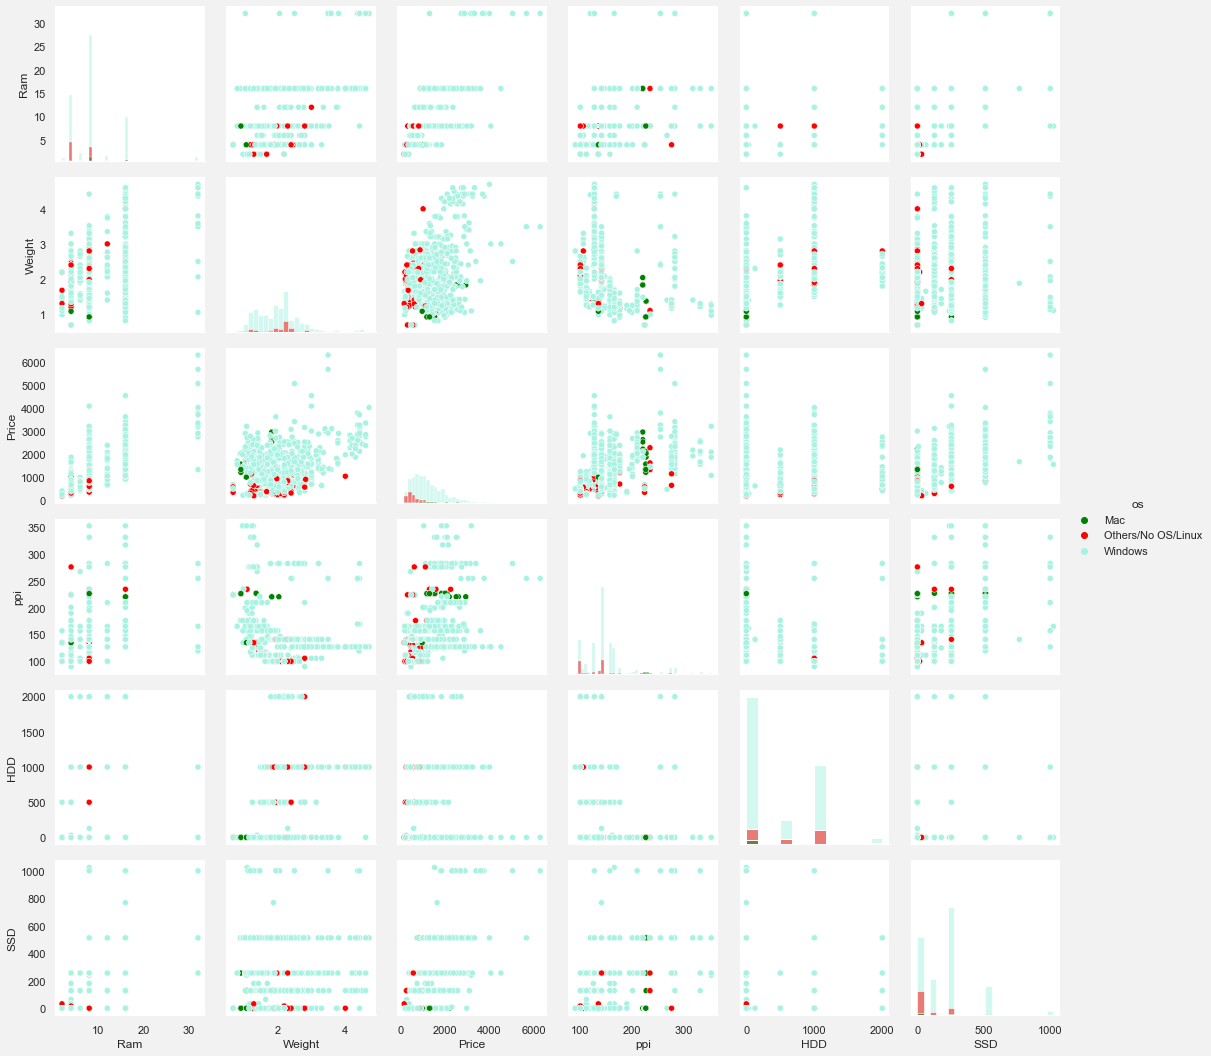

In [76]:
#sns.set(rc={"axes.facecolor":"1","figure.facecolor":".95",'figure.figsize':(10,5)})
df_2 =df[["Ram","Weight","Price","ppi","HDD","SSD","os"]]
df_2.head()
pallet = ['green', 'red',"#a8f2e2"]
g = sns.PairGrid(df_2, hue="os",palette=pallet)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()


# DATA PREPROCESSING

In [77]:
df.drop(columns=['ScreenResolution','Cpu','Cpu Name','OpSys'],inplace=True)

In [78]:
df.drop(columns=["cpu_frq(GHz)"],inplace=True)

In [79]:
df.drop(columns=["Product"],inplace=True)

In [80]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [81]:
X

,Company,TypeName,Ram,Gpu,Weight,Touchscreen,IPS,ppi,os,Cpu Brand,HDD,SSD
0,Apple,Ultrabook,8,Intel,1.37,0,1,226.983005,Mac,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel,1.34,0,0,127.677940,Mac,Intel Core i5,0,0
2,HP,Notebook,8,Intel,1.86,0,0,141.211998,Others/No OS/Linux,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD,1.83,0,1,220.534624,Mac,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel,1.37,0,1,226.983005,Mac,Intel Core i5,0,256
...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,2 in 1 Convertible,4,Intel,1.80,1,1,157.350512,Windows,Intel Core i7,0,128
1271,Lenovo,2 in 1 Convertible,16,Intel,1.30,1,1,276.053530,Windows,Intel Core i7,0,512
1272,Lenovo,Notebook,2,Intel,1.50,0,0,111.935204,Windows,Other Intel Processor,0,0
1273,HP,Notebook,6,AMD,2.19,0,0,100.454670,Windows,Intel Core i7,1000,0


In [82]:
y

0       7.232505
1       6.833528
2       6.386681
3       7.871226
4       7.529851
          ...   
1270    6.490650
1271    7.344865
1272    5.466033
1273    6.670879
1274    5.943108
Name: Price, Length: 1270, dtype: float64

In [83]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

# Linear regression

In [85]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [86]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,9])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.748278471634061
MAE 0.2283656662311139


# KNN

In [87]:
from sklearn.neighbors import KNeighborsRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,9])
],remainder='passthrough')

step2 = KNeighborsRegressor()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7486383725901444
MAE 0.2016027842521656


# Random Forest

In [150]:
from sklearn.ensemble import RandomForestRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,9])
],remainder='passthrough')

#step2 = RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
step2 = RandomForestRegressor(random_state=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8549974197512404
MAE 0.16599286691851262


# XgBoost

In [90]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [91]:
#from xgboost import XGBRegressor
from xgboost import XGBRegressor
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,9])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8512413096263873
MAE 0.1617838843642313


In [92]:
# Model comparison

LinearRegression
R2 score 0.748278471634061
MAE 0.2283656662311139
Ridge
R2 score 0.7628621467373088
MAE 0.22267132547305693
Lasso
R2 score 0.7616292188317845
MAE 0.22332382975204262
KNN
R2 score 0.7486383725901444
MAE 0.2016027842521656
RandomForest
R2 score 0.8549974197512404
MAE 0.16599286691851262


<Figure size 1080x504 with 0 Axes>

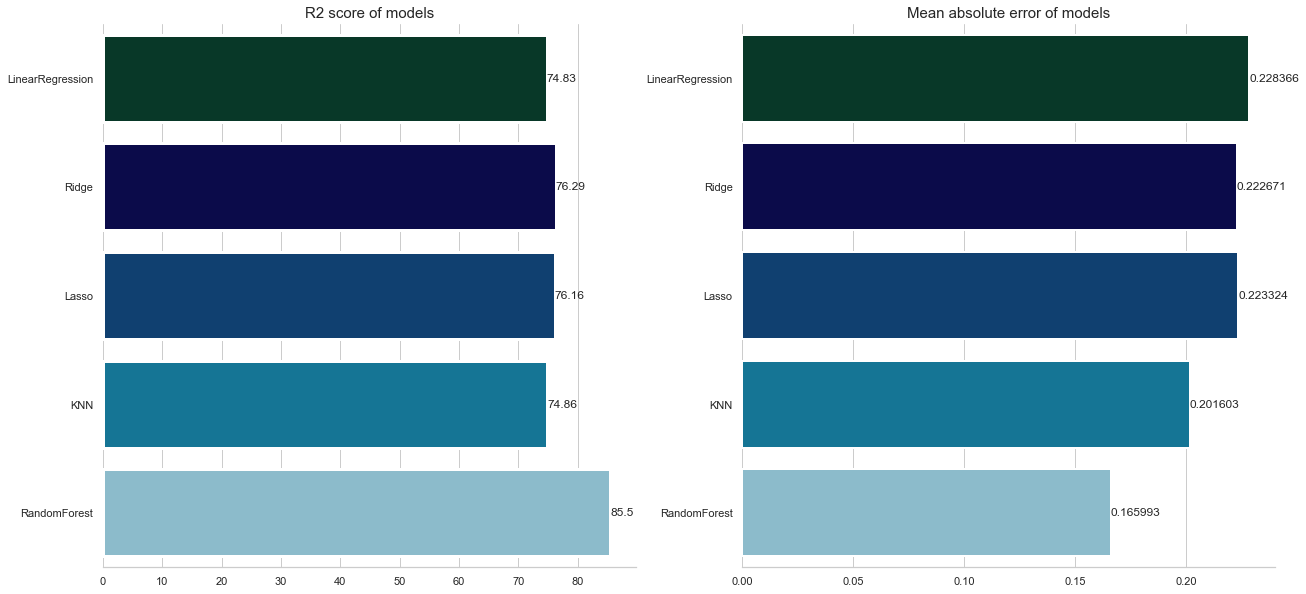

In [191]:

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

knn=KNeighborsRegressor()
lin=LinearRegression()
#rfr = RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
rfr = RandomForestRegressor(random_state=3)
rid= Ridge(alpha=10)
las=Lasso(alpha=0.001)
#xgb = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

models=[lin,rid,las,knn,rfr]#,xgb]
model_names=['LinearRegression','Ridge','Lasso','KNN','RandomForest']#,'xgboost ']

sns.despine()
fig,ax=plt.subplots(1,2)
fig.set_figwidth(21)
fig.set_figheight(10)

r2_scores=list()
mean_scores=list()
i=0

for model in models:
    step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,9])],remainder='passthrough')

    step2 = model

    pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)])

    pipe.fit(X_train,y_train)

    y_pred = pipe.predict(X_test)
    print(model_names[i])
    print('R2 score',r2_score(y_test,y_pred))
    r2_scores.append(r2_score(y_test,y_pred))
    print('MAE',mean_absolute_error(y_test,y_pred))
    mean_scores.append(mean_absolute_error(y_test,y_pred))
    i=i+1
flatui = 'ocean'#["thistle", "skyblue", "peachpuff","mistyrose","khaki"]
#sns.set_palette(flatui)    
plot_1 = sns.barplot(x=np.round(pd.Series(r2_scores)*100,2),y=pd.Series(model_names),ax=ax[0], capsize=0, errcolor=".5",
    linewidth=3, edgecolor="1",palette=flatui)
for i in plot_1.containers:
    plot_1.bar_label(i,)
ax[0].set_title("R2 score of models",fontsize=15)
plot_2 = sns.barplot(x=pd.Series(mean_scores),y=pd.Series(model_names),ax=ax[1], capsize=.4, errcolor=".5",
    linewidth=2, edgecolor="1", palette=flatui)
for i in plot_2.containers:
    plot_2.bar_label(i,)
ax[1].set_title("Mean absolute error of models", fontsize=15)
sns.despine(left=True)
plt.show()
#https://www.geeksforgeeks.org/how-to-show-values-on-seaborn-barplot/

# HyperParameter Tuning

DecisionTree

In [96]:
from sklearn.tree import DecisionTreeRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,9])
],remainder='passthrough')

step2 = DecisionTreeRegressor()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print(step2)
  

R2 score 0.7654515031658774
MAE 0.2079085335827414
DecisionTreeRegressor()


In [160]:
params={'step2__ccp_alpha': [0.0],
 'step2__criterion': ['squared_error'],
 'step2__max_depth': [None],
 'step2__max_features': [None],
 'step2__max_leaf_nodes': [None],
 'step2__min_impurity_decrease': [0.0],
 'step2__min_samples_leaf': [1],
 'step2__min_samples_split': [2],
 'step2__min_weight_fraction_leaf': [0.0],
 'step2__random_state': [None,3],
 'step2__splitter': ['best']}

In [178]:
from sklearn.model_selection import GridSearchCV
grid_obj  = GridSearchCV(pipe,params, cv=5, scoring='accuracy')
grid_fit =grid_obj.fit(X_train, y_train)
#------
best_model = grid_fit.best_estimator_
best_model.score(X_test, y_test)

0.8015340486504108